In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
from pypalettes import load_cmap
#cmap = load_cmap("Acanthurus_leucosternon")
cmap = load_cmap("Aquamarine")


In [3]:
# Import data from the source:
# https://www.kaggle.com/datasets/datascientistanna/customers-dataset/data

#import kagglehub

# Download latest version
#path = kagglehub.dataset_download("datascientistanna/customers-dataset")

#print("Path to dataset files:", path)

In [4]:
# Install kagglehub in case library is missing
# pip install kagglehub

In [9]:
df = pd.read_csv('..\data\Customers.csv')

<>:1: DeprecationWarning: invalid escape sequence \d
<>:1: DeprecationWarning: invalid escape sequence \d
C:\Users\Olenka\AppData\Local\Temp\ipykernel_22060\1818558186.py:1: DeprecationWarning: invalid escape sequence \d
  df = pd.read_csv('..\data\Customers.csv')


In [10]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [12]:
df.shape

(2000, 8)

In [13]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income ($)          int64
Spending Score (1-100)     int64
Profession                object
Work Experience            int64
Family Size                int64
dtype: object

In [14]:
# Let's check duplicates
df.duplicated().sum()

np.int64(0)

In [15]:
# Let's check missing values
df.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [16]:
# Cleaning dataset - have 35 missing datapoints in Profession column
# Let's check what is the most frequent value
mode_prof = df['Profession'].mode()[0]

In [17]:
mode_prof

'Artist'

In [18]:
# Filling missing values with most frequent one
df['Profession'] = df['Profession'].fillna(mode_prof)

In [19]:
# Filling missing values with most frequent one
df['Profession'] = df['Profession'].fillna(mode_prof)


import os
os.getcwd()



'c:\\Users\\Olenka\\DSI_2\\notebooks'

In [21]:
df.isnull().sum()

#export the proccessed data
df.to_csv('../data/customers_clean.csv', index=False)



In [22]:
df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


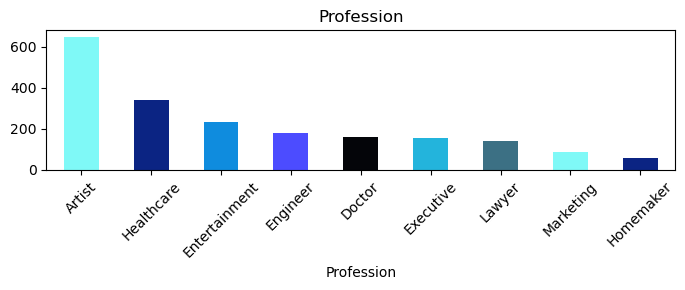

In [23]:
#visualizing the dataset to identify the count of customers in each profession
plt.figure(figsize=(7, 3))
df['Profession'].value_counts().plot(kind='bar', color=cmap.colors)
plt.title('Profession')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

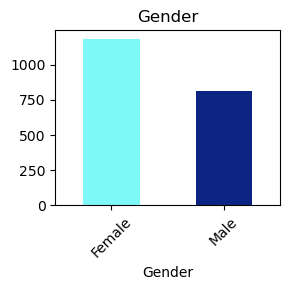

In [24]:
#visualizing the dataset to identify the count of male and female
plt.figure(figsize=(3,3))
df['Gender'].value_counts().plot(kind='bar', color=cmap.colors)
plt.title('Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

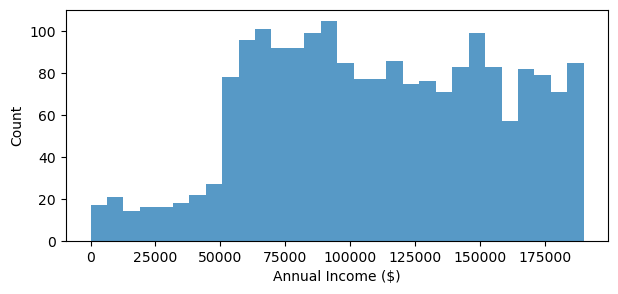

In [25]:
#visualizing the dataset to identify the number of customers in each annual income category
plt.figure(figsize=(7, 3))
sns.histplot(data=df, x='Annual Income ($)', bins=30, edgecolor='none')
plt.show()

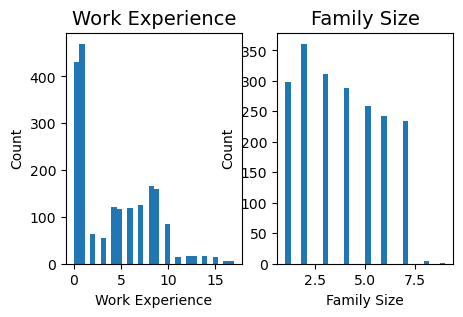

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(5, 3))
cols = [ "Work Experience", "Family Size"]

for ax, col in zip(axes, cols):
    ax.hist(df[col], bins=30, edgecolor='none')
    ax.set_title(col, fontsize=14)
    ax.set_xlabel(col)
    ax.set_ylabel("Count")

plt.show()

In [27]:
# Create a box plot of Age by Gender
anual_income_gender_boxplot = px.box(df, x='Gender', y='Annual Income ($)', color='Gender', title='Distribution of Anual Income ($) by Gender')

# Display the plot
anual_income_gender_boxplot.show()

In [29]:
# Create a box plot for annual income grouped by profession
fig = px.box(df, y='Annual Income ($)', x='Profession', color="Gender")

# Set the title of the plot
fig.update_layout(title_text='Annual Income Distribution by Profession')

# Show the plot
fig.show()

In [30]:
fig = px.histogram(df, x='Spending Score (1-100)', marginal='violin')

# Display the plot
fig.show()

In [31]:
# define the categorical columns.
categorical_columns = ['Gender', 'Profession']

# define the remarkable columns.
numerical_columns = ['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size']

In [32]:
for cat_col in categorical_columns:
    
    # Initialise label encoder.
    encoder = LabelEncoder()
    
    # Apply transformation.
    df[cat_col] = encoder.fit_transform(df[cat_col])

In [33]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,1,19,15000,39,5,1,4
1,2,1,21,35000,81,2,3,3
2,3,0,20,86000,6,2,1,1
3,4,0,23,59000,77,7,0,2
4,5,0,31,38000,40,3,2,6


In [34]:
# Initialise standard scalar.
scaler = StandardScaler()

# Rescaled data.
full_data = scaler.fit_transform(df)
full_data[:5]

array([[-1.731185  ,  1.20706357, -1.05408932, -2.09350095, -0.42833854,
         0.87049473, -0.79120713,  0.11749744],
       [-1.72945295,  1.20706357, -0.98372287, -1.65613312,  1.07554599,
        -0.30637962, -0.28116224, -0.39005088],
       [-1.7277209 , -0.82845678, -1.0189061 , -0.54084515, -1.6099621 ,
        -0.30637962, -0.79120713, -1.40514752],
       [-1.72598885, -0.82845678, -0.91335643, -1.13129172,  0.93231889,
         1.65507763, -1.04622958, -0.8975992 ],
       [-1.72425679, -0.82845678, -0.63189066, -1.59052794, -0.39253176,
         0.08591183, -0.53618469,  1.13259408]])

In [35]:
# Calculate correlation
corr = df.corr()

# Create the correlation matrix heatmap
fig = go.Figure(data=go.Heatmap(
                   z=corr.values,
                   x=corr.columns,
                   y=corr.columns,
                   colorscale='Viridis',
                   colorbar=dict(title='Correlation')))

# Update heatmap layout
fig.update_layout(title='Correlation Heatmap',
                  xaxis=dict(side='top'))

# Show the figure
fig.show()

In [36]:
# Select relevant features
features = ['Age', 'Gender', 'Profession', 'Family Size',
            'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience']
X = df[features]

In [37]:
# Scale features 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])